#데이터 정보
- Auction_key : 경매 아파트 고유 키값
- Auction_class : 경매구분 (강제 경매 / 임의 경매) **
- Bid_class : 입찰구분(일반/개별/일괄) **
- Claim_price : 경매 신청인의 청구 금액
- Appraisal_company : 감정사 **
- Appraisal_date : 감정일자
- Auction_count : 총 경매 횟수
- Auction_miscarriage_count : 총 유찰 횟수
- Total_land_gross_area : 총토지전체면적(㎡)
- Total_land_real_area : 총토지실면적(㎡)
- Total_land_auction_area : 총토지경매면적(㎡)
- Total_building_area : 총건물면적(㎡)
- Total_building_auction_area : 총건물경매면적(㎡)
- Total_appraisal_price : 총감정가
- Minimum_sales_price : 최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액
- First_auction_date : 최초경매일
*   Final_auction_date : 최종경매일
* Final_result : 최종결과
* Creditor : 채권자, 경매 신청인 **
* addr_do : 주소_시도 **
* addr_si :주소_시군구 **
* addr_dong : 주소_읍면동 **
* addr_li ** (대부분 Nan값)
* addr_san : 주소_산번지 여부(Y) 
* addr_bunji1
* addr_bunji2
* addr_etc
* Apartment_usage : 건물(토지)의 대표 용도
* Completion_date : 준공일
* Preserve_regist_date : 보존등기일, 건물을 신축하고 처음으로 등기
* Total_floor : 총층수
* Current_floor : 현재층수
* Specific : 기타_특이사항
* Share_auction_YorN : 지분경매 여부(Y), 하나의 부동산이 전체가 아닌 일부만 경매가 진행
* road_name
* road_bunji1
* road_bunji2
* Close_date : 종국일자 -> 종국X -> 날짜가 1111-11-11
* Close_result : 종국결과
* point.y : 위도
* point.x : 경도
* Hammer_price : 낙찰가

- train 1933 rows × 41 columns
- test  829 rows × 41 columns (Hammer_price : 낙찰가 = 0)

#데이터 전처리
- Final_result : 최종 결과 모두 낙찰이므로 행 삭제

In [80]:
!unzip Auction_master_kr.zip

Archive:  Auction_master_kr.zip
replace Auction_rent.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Auction_rent.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Auction_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Auction_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Auction_master_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Auction_master_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Auction_master_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Auction_master_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Auction_regist.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Auction_regist.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Auction_result.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._Auction_result.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [81]:
import pandas as pd
train = pd.read_csv("Auction_master_train.csv")
test = pd.read_csv("Auction_master_test.csv")

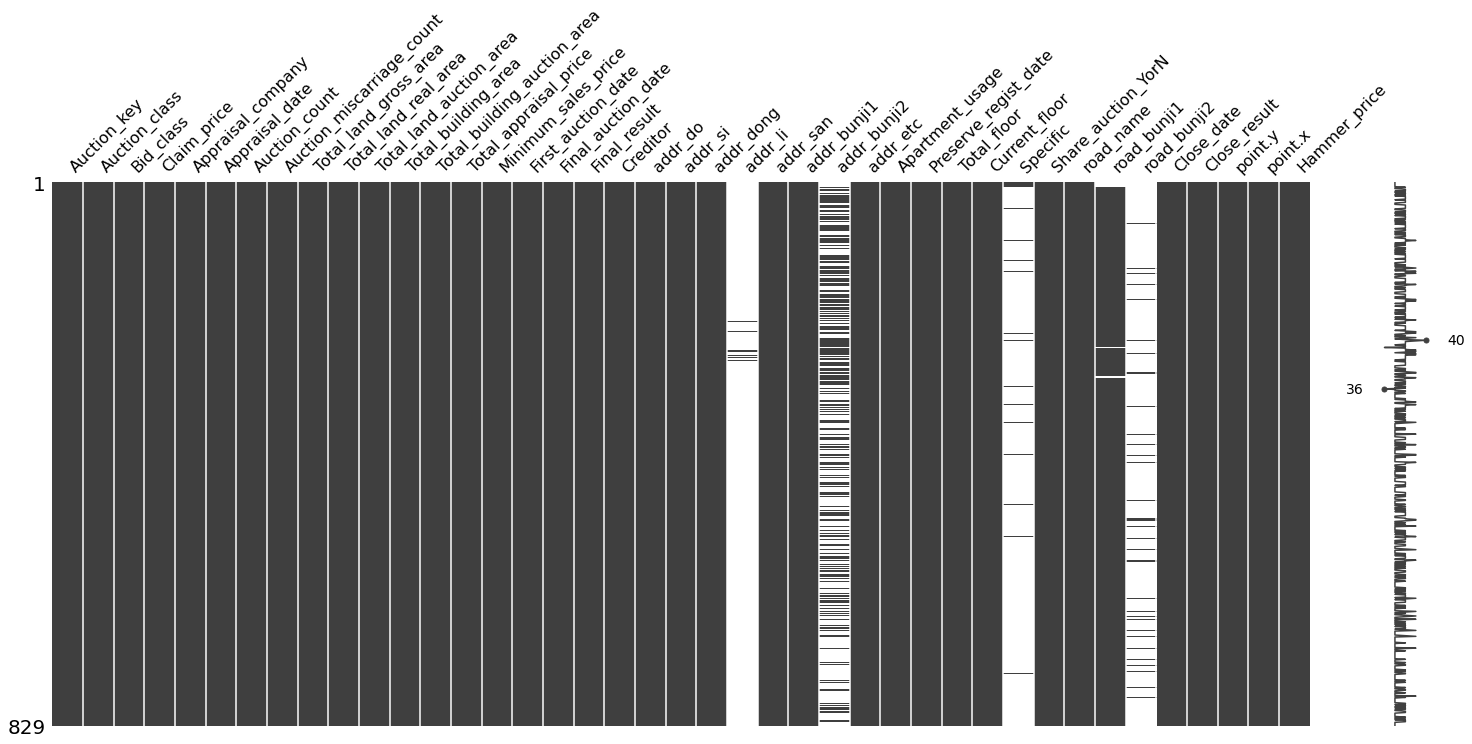

In [82]:
import missingno as msno
msno.matrix(test)

In [83]:
#Hammer_price와 다른 행과의 상관계수
train.corr()['Hammer_price'].sort_values() 

Auction_key                   -0.418769
point.x                       -0.296312
Auction_count                 -0.016999
Auction_miscarriage_count     -0.011296
addr_bunji2                   -0.003641
addr_bunji1                   -0.003139
road_bunji1                    0.020404
Total_land_gross_area          0.070466
Current_floor                  0.198013
road_bunji2                    0.206681
Total_floor                    0.220830
Claim_price                    0.267728
point.y                        0.295698
Total_land_real_area           0.696099
Total_land_auction_area        0.700639
Total_building_area            0.768454
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

In [84]:
#Minimum_sales_price의 상관계수가 매우 높기 때문에 다른 feature들의 정보가 묻힐 수 있다.
#따라서 Minimum_sales_price 대비 몇%인지를 예측하도록 문제를 변형한다.
train['real'] = train['Hammer_price']/train['Minimum_sales_price']
test['real'] = test['Hammer_price']/test['Minimum_sales_price']
test_min = test['Minimum_sales_price']

del train["Hammer_price"]
del test["Hammer_price"]


In [85]:
#real 행에 대한 상관계수
train.corr()['real'].sort_values()

Auction_key                   -0.062281
Current_floor                 -0.055320
Total_floor                   -0.051261
Minimum_sales_price           -0.043354
point.x                       -0.039228
road_bunji1                   -0.021403
Total_building_area           -0.003254
addr_bunji2                   -0.002527
Total_building_auction_area   -0.001822
Total_appraisal_price         -0.000727
Total_land_gross_area          0.007116
Total_land_real_area           0.008682
Total_land_auction_area        0.009340
addr_bunji1                    0.013124
point.y                        0.038030
road_bunji2                    0.047078
Claim_price                    0.100713
Auction_count                  0.354610
Auction_miscarriage_count      0.380068
real                           1.000000
Name: real, dtype: float64

In [86]:
'''
falld(Minimum_sales_price/Total_appraisal_price)라는 변수 생성
최저경매가가 유찰이 진행될 수록 감정가의 80% ,64% ,51.2%,41%,32.8%, 26.2%, 21%, 16.8%, 13.4% 이런 식으로 떨어진다
따라서 lastupp, 낙찰되기 직전의 유찰된 경매에서의 Minimum_sales_price / Total_appraisal_price,이라는 변수를 생성한다.
'''

#감정가의 몇%인지 구한다.
train['falld'] = (train['Minimum_sales_price']/train['Total_appraisal_price']).round(3)
test['falld']=(test['Minimum_sales_price']/test['Total_appraisal_price']).round(3)

a=pd.Series([0.134,0.168,0.21,0.262,0.328,0.41,0.512,0.64,0.8,1,1])
b=pd.Series([0,0.134,0.168,0.21,0.262,0.328,0.41,0.512,0.64,0.8,1,1])

#낙찰되기 직전의 유찰된 경매에서의 비율을 구한다.
train['lastupp']=train.apply(lambda x: a[b==x['falld']].iloc[0],axis=1)
test['lastupp']=test.apply(lambda x: a[b==x['falld']].iloc[0],axis=1)

#이전 최저 경매가 / 현재 최저 경매가   와 결과가 동일                   
train['upp']=train['lastupp']/train['falld']
test['upp']=test['lastupp']/test['falld']

#이전 최저 경매가 비율* 총감정가 --> 이전 최저 경매가
train['lastupp_p']=train['lastupp']*train['Total_appraisal_price']
test['lastupp_p']=test['lastupp']*test['Total_appraisal_price']

#유찰이 한번도 되지 않았을 경우
train['one']=train['Auction_miscarriage_count']==0
test['one']=test['Auction_miscarriage_count']==0


del train["Minimum_sales_price"]
del test["Minimum_sales_price"]

del train["Total_appraisal_price"]
del test["Total_appraisal_price"]

In [87]:
#해당 방의 층을 아파트의 전체 층으로 나눈 층의 비율을 floor_rate 라는 변수로 만듦.
#아파트마다 층이 다르므로, 이를 비교하기위한 normalization 과정이라 할 수 있다.
train['floor_rate']=train['Current_floor']/train['Total_floor']
test['floor_rate']=test['Current_floor']/test['Total_floor']

del train["Current_floor"]
del test["Current_floor"]

del train["Total_floor"]
del test["Total_floor"]

In [88]:
print(train.Final_result.unique())
print(test.Final_result.unique())
del train["Final_result"]
del test["Final_result"]
print(train.shape)

['낙찰']
['낙찰']
(1933, 42)


In [89]:
#addr_etc 행 제거 -> 위도 경도에서 정확한 위치 내포
# 도로명주소 제거 -> 번지 주소가 있음 
del train["addr_etc"]
del test["addr_etc"]

del train["road_name"]
del test["road_name"]

del train["road_bunji1"]
del test["road_bunji1"]

del train["road_bunji2"]
del test["road_bunji2"]

In [90]:
#Specific(기타사항)행 제거
del train["Specific"]
del test["Specific"]
print(train.shape)

(1933, 37)


In [91]:
#Auction_key 행 제거
del train["Auction_key"]
del test["Auction_key"]
print(train.shape)

(1933, 36)


In [92]:
#번지 자세한 주소가 큰 관여 할 것 같지 않음 (추측)
del train["addr_bunji1"]
del test["addr_bunji1"]

del train["addr_bunji2"]
del test["addr_bunji2"]

#채권자, 매우 다양하기 때문에 삭제
del train["Creditor"]
del test["Creditor"]

#주소 산번지 여부, 거의다 N
del train["addr_san"]
del test["addr_san"]

print(train.shape)

(1933, 32)


In [93]:
train_x = train.loc[:, "Auction_class": "point.x"]
train_y = train["real"]
test_x = test.loc[:, "Auction_class": "point.x"]

In [94]:
#동+리

notnull_test = [212, 227, 231, 237, 256, 258, 263, 264, 267, 269, 272]
notnull_train_x = [46,  63,  72,  93, 103, 110, 181, 214, 249, 324, 336, 339, 340, 346, 411, 414, 456, 473, 550, 612, 618, 635, 639]

#train
addr_dong = train_x.loc[:, "addr_dong"]

for i in notnull_train_x:
  dongli = train_x.loc[i]["addr_dong"]+train_x.loc[i]["addr_li"]
  addr_dong[i] = dongli

train_x["addr_dong"] = addr_dong

#test
addr_dong = test_x.loc[:, "addr_dong"]

for i in notnull_test:
  dongli = test_x.loc[i]["addr_dong"]+test_x.loc[i]["addr_li"]
  addr_dong[i] = dongli

test_x["addr_dong"] = addr_dong

del train_x["addr_li"]
del test_x["addr_li"]
print(train_x.shape)

(1933, 24)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #"Appraisal_company"
label = ["Auction_class", "Bid_class", "Apartment_usage", "Close_result", "addr_do", "addr_si", "Share_auction_YorN"]


for i in label :
  train_x[i] = le.fit_transform(train_x[i])
  test_x[i] = le.transform(test_x[i])

train_x["Appraisal_company"] = le.fit_transform(train_x["Appraisal_company"])
test_le_list = list(le.classes_ )
not_append = ['LH감정', '밝은숲감정', '새날감정', '성우감정', '씨티감정', '아람감정', '정우감정', '정인제감정', '청림감정']
test_le_list.extend(not_append)
le.fit(test_le_list)
test_x["Appraisal_company"] = le.transform(test_x["Appraisal_company"])


train_x["addr_dong"] = le.fit_transform(train_x["addr_dong"])
test_le_list = list(le.classes_ )
not_append = ['궁동', '금호동1가', '금호동3가', '금호동4가','기장읍청강리', '대현동', '문래동4가','보문동3가', '봉래동5가', '삼락동', '송정동', '신공덕동', '신창동1가', '신호동', '양평동3가', 
              '양평동4가', '염리동', '영등포동5가', '용산동5가', '자곡동','장충동1가','청룡동','충무동2가', '한강로1가','합정동','후암동']
test_le_list.extend(not_append)
le.fit(test_le_list)
test_x["addr_dong"] = le.transform(test_x["addr_dong"])

In [96]:
#날짜 형식(년월일시간) -----> 년.월 로 변경

import numpy as np
import datetime


df = pd.DataFrame({'Appraisal_date': pd.to_datetime(train_x['Appraisal_date'])},index=train_x.index)
df['Appraisal_dateYM'] = df['Appraisal_date'].dt.year + (df['Appraisal_date'].dt.month * 0.01)
train_x['Appraisal_date'] = df['Appraisal_dateYM']

df = pd.DataFrame({'First_auction_date': pd.to_datetime(train_x['First_auction_date'])},index=train_x.index)
df['First_auction_dateYM'] = df['First_auction_date'].dt.year + (df['First_auction_date'].dt.month * 0.01)
train_x['First_auction_date'] = df['First_auction_dateYM']

df = pd.DataFrame({'Final_auction_date': pd.to_datetime(train_x['Final_auction_date'])},index=train_x.index)
df['Final_auction_dateYM'] = df['Final_auction_date'].dt.year + (df['Final_auction_date'].dt.month * 0.01)
train_x['Final_auction_date'] = df['Final_auction_dateYM']


df = pd.DataFrame({'Appraisal_date': pd.to_datetime(test_x['Appraisal_date'])},index=train_x.index)
df['Appraisal_dateYM'] = df['Appraisal_date'].dt.year + (df['Appraisal_date'].dt.month * 0.01)
test_x['Appraisal_date'] = df['Appraisal_dateYM']

df = pd.DataFrame({'First_auction_date': pd.to_datetime(test_x['First_auction_date'])},index=train_x.index)
df['First_auction_dateYM'] = df['First_auction_date'].dt.year + (df['First_auction_date'].dt.month * 0.01)
test_x['First_auction_date'] = df['First_auction_dateYM']

df = pd.DataFrame({'Final_auction_date': pd.to_datetime(test_x['Final_auction_date'])},index=train_x.index)
df['Final_auction_dateYM'] = df['Final_auction_date'].dt.year + (df['Final_auction_date'].dt.month * 0.01)
test_x['Final_auction_date'] = df['Final_auction_dateYM']




#1111-11-11 00:00:00 형으로 아래 두개의 행은 삭제하도록 한다.

del train_x["Preserve_regist_date"]
del test_x["Preserve_regist_date"]

del train_x["Close_date"]
del test_x["Close_date"]

#df = pd.DataFrame({'Preserve_regist_date': pd.to_datetime(train_x['Preserve_regist_date'])},index=train_x.index)
#df['Preserve_regist_dateYM'] = df['Preserve_regist_date'].dt.year + (df['Preserve_regist_date'].dt.month * 0.01)
#train_x['Preserve_regist_date'] = df['Preserve_regist_dateYM']

#df = pd.DataFrame({'Close_date': pd.to_datetime(train_x['Close_date'])},index=train_x.index)
#df['Close_dateYM'] = df['Close_date'].dt.year + (df['Close_date'].dt.month * 0.01)
#train_x['Close_date'] = df['Close_dateYM']

In [97]:
train_x

,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,First_auction_date,Final_auction_date,addr_do,addr_si,addr_dong,Apartment_usage,Share_auction_YorN,Close_result,point.y,point.x
0,1,0,1766037301,181,2017.07,2,1,12592.0,37.35,37.35,181.77,181.77,2018.02,2018.03,0,38,208,1,0,1,35.162717,129.137048
1,1,2,152946867,237,2016.09,2,1,42478.1,18.76,18.76,118.38,118.38,2016.12,2017.02,0,38,208,0,0,1,35.156633,129.145068
2,1,0,11326510,233,2016.11,3,2,149683.1,71.00,71.00,49.94,49.94,2017.07,2017.10,0,20,91,0,0,1,35.184601,128.996765
3,1,2,183581724,128,2016.12,2,1,24405.0,32.98,32.98,84.91,84.91,2017.07,2017.11,0,10,61,0,0,1,35.154180,129.089081
4,0,2,45887671,46,2016.03,2,1,774.0,45.18,45.18,84.96,84.96,2016.07,2016.08,0,21,21,0,0,1,35.099630,128.998874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0,2,280000000,99,2017.02,1,0,66419.3,40.55,40.55,84.87,84.87,2017.06,2017.06,1,12,251,0,0,1,37.648810,127.048683
1929,1,2,200000000,95,2015.02,2,1,20433.8,39.60,39.60,114.81,114.81,2017.02,2017.03,1,11,133,0,0,1,37.663291,127.077063
1930,1,2,354805459,107,2016.10,2,1,7460.8,19.03,19.03,133.98,133.98,2017.12,2018.01,1,36,285,1,0,1,37.558319,126.981994
1931,0,2,80000000,222,2016.06,2,1,16875.8,42.20,42.20,84.94,84.94,2016.10,2016.11,1,12,172,0,0,1,37.647061,127.028002


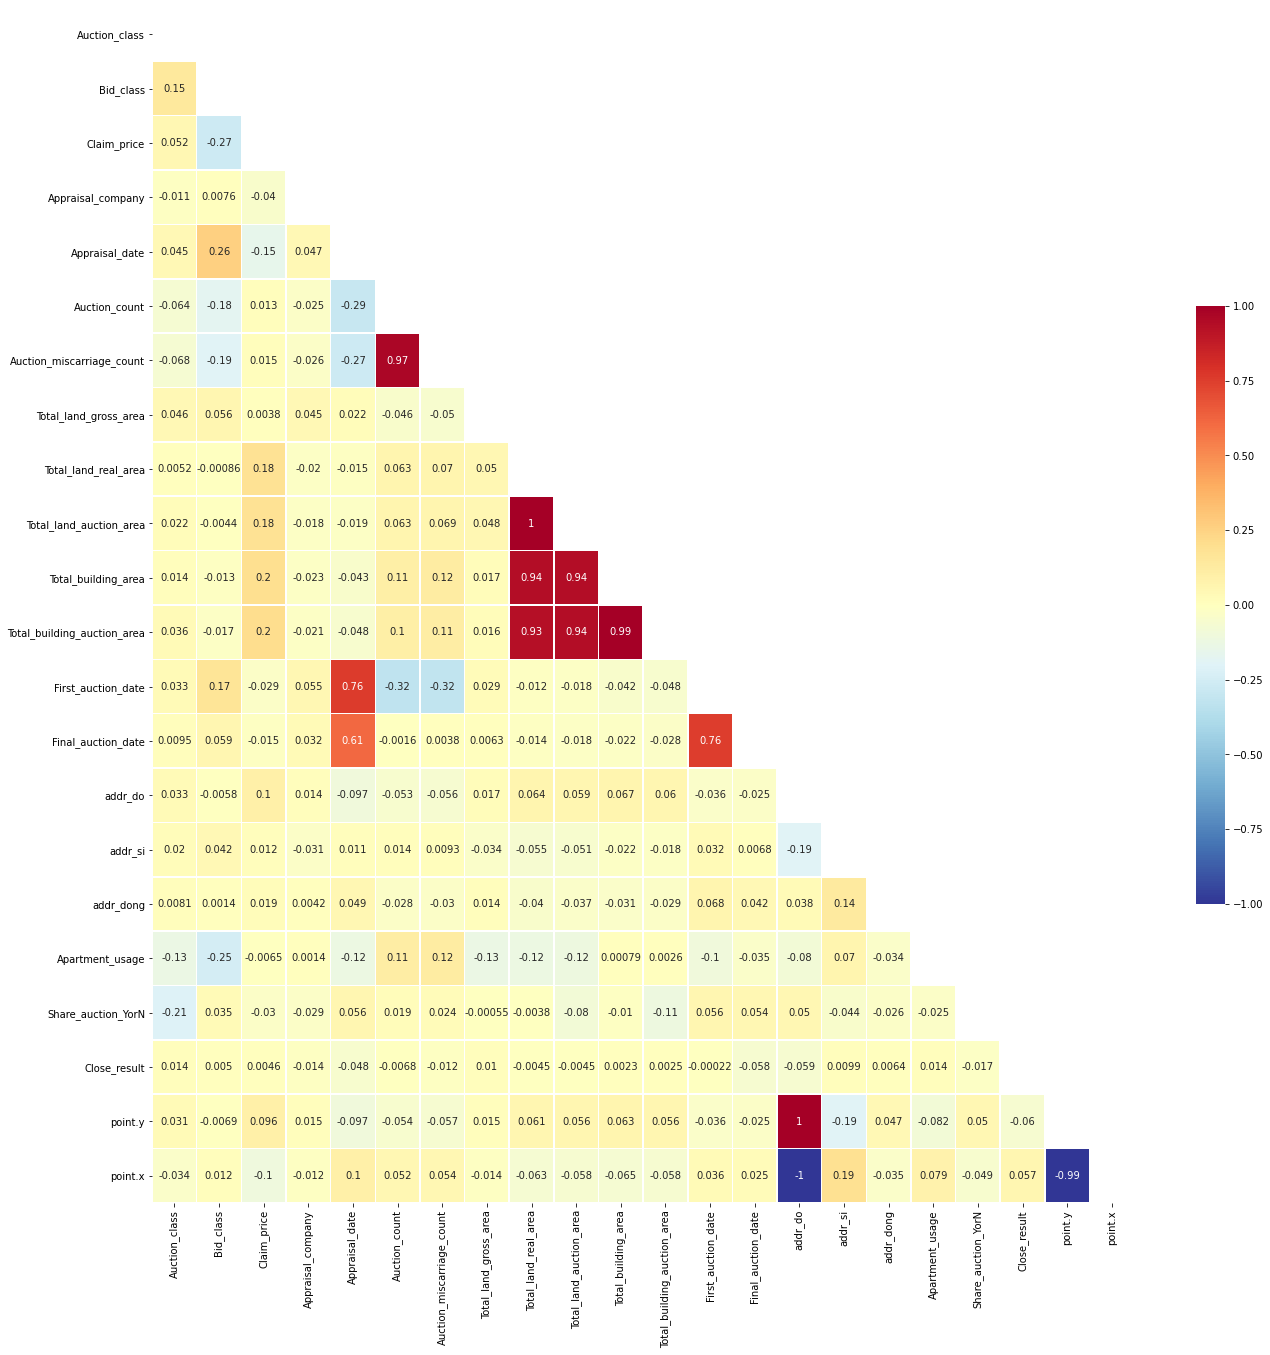

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = train_x.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(22,22) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


# 모델 학습

In [99]:
import torch
import torch.optim as optim
import numpy as np

import random
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(777)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
  torch.cuda.manual_seed_all(777)


x_data = np.array(train_x)
y_data = np.array(train_y)

x_train = torch.FloatTensor(x_data).to(device)
y_train = torch.FloatTensor(y_data).unsqueeze(1).to(device)
y_train

tensor([[1.1364],
        [1.1322],
        [1.2264],
        ...,
        [1.0885],
        [1.2377],
        [1.1434]], device='cuda:0')

In [100]:
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, drop_last=True)

In [106]:
linear1 = torch.nn.Linear(22,256,bias=True)
linear2 = torch.nn.Linear(256,128,bias=True)
linear3 = torch.nn.Linear(128, 1,bias=True)
relu = torch.nn.ReLU()

In [107]:
torch.nn.init.xavier_normal_(linear1.weight)
torch.nn.init.xavier_normal_(linear2.weight)
torch.nn.init.xavier_normal_(linear3.weight)

Parameter containing:
tensor([[ 0.2072,  0.0246, -0.1144, -0.0550, -0.0998,  0.3159, -0.0385,  0.1363,
          0.0881,  0.2014, -0.0551, -0.0284,  0.1647, -0.1137, -0.0562,  0.0825,
         -0.1137,  0.1052,  0.0373, -0.2082,  0.0432, -0.0113,  0.1108,  0.1164,
         -0.0449, -0.0847,  0.0562,  0.0490, -0.2217, -0.0764, -0.0839,  0.2448,
          0.0751, -0.0421,  0.1126,  0.1480,  0.1332, -0.0184,  0.1023, -0.1237,
         -0.0739,  0.1289, -0.0483,  0.0387, -0.0112,  0.0275, -0.0620, -0.0810,
          0.0772,  0.0901, -0.2292,  0.0054,  0.1427, -0.1322,  0.0997, -0.0153,
          0.0320,  0.0498,  0.2063, -0.2454, -0.0834,  0.0119,  0.1630,  0.0632,
          0.1118, -0.0437,  0.0194, -0.0548,  0.0126, -0.1468, -0.0582, -0.1199,
         -0.0802,  0.1425,  0.0327, -0.0025,  0.0769,  0.0186, -0.0422,  0.1035,
         -0.1166, -0.1238, -0.3978, -0.0054, -0.1450,  0.1687, -0.2234, -0.1820,
          0.1515,  0.1104,  0.0857,  0.0885,  0.0328, -0.0763,  0.0912,  0.2655,
      

In [108]:
model = torch.nn.Sequential(linear1,relu, linear2,relu,
                            linear3).to(device)

In [109]:
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
loss = torch.nn.MSELoss().to(device)
epochs = 500
cost_list = []
for epoch in range(epochs+1):
  for x,y in dataloader:

    x = x.to(device)
    y = y.to(device)

    hypothesis = model(x)
    cost = loss(hypothesis, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

  if epoch%100 == 0:
    print('Epoch {} Cost {}'.format(epoch, cost.item()))

Epoch 0 Cost 222303404032.0
Epoch 100 Cost 7226736640.0
Epoch 200 Cost 20969787392.0
Epoch 300 Cost 6886991360.0
Epoch 400 Cost 42660962304.0
Epoch 500 Cost 44581904384.0


In [ ]:
test_min

In [110]:
x_test = torch.FloatTensor(np.array(test_x)).to(device)
predict = model(x_test).detach()

predict = predict.cpu().numpy().reshape(-1, 1)
test_min = test_min.values.reshape(-1, 1)
predict = predict*test_min


submit = pd.read_csv("Auction_submission.csv")

for i in range(len(predict)):
  submit["Hammer_price"][i] = predict[i].item()

submit.to_csv("submission.csv", index = False, header = True)
#성능 659447345294244.4	